In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv("../data/ifng_true_balanced_w_parts_w_binding_scores_w_iedb.csv")
test_data = all_data.dropna(axis=0)
labels = [min(1,x) for x in test_data["positive_subjects"]]
test_data.insert(0,"labels",labels)

In [4]:
test_data

,labels,Unnamed: 0,peptide,HLA_allele,potential,tested_subjects,positive_subjects,immunogenicity,parts,binding_score,IEDB_predictions
0,1.0,0,SLMDLLSSL,HLA-A*02:01,0.285714,19.0,5.0,Positive,1.0,0.977676,-0.29220
1,1.0,1,AMPFSIFYPM,HLA-A*02:01,0.400000,3.0,1.0,Positive,3.0,0.013863,0.18330
2,1.0,2,SSQVLQQSTY,HLA-A*01:01,0.294118,15.0,4.0,Positive,5.0,0.595362,-0.34564
3,0.0,3,QLSEYQTSV,HLA-A*02:01,0.083333,10.0,0.0,Negative,7.0,0.927334,-0.12949
4,1.0,4,ILIEGIFFA,HLA-A*02:01,0.933333,13.0,13.0,Positive,8.0,0.946821,0.46943
...,...,...,...,...,...,...,...,...,...,...,...
3223,0.0,3223,SLLYEYFTV,HLA-A*02:01,0.071429,12.0,0.0,Negative,3.0,0.766021,0.20818
3224,0.0,3224,KTSERSQPR,HLA-A*11:01,0.142857,5.0,0.0,Negative,3.0,0.631321,-0.16252
3225,1.0,3225,MIAQYTSAL,HLA-A*02:01,0.400000,3.0,1.0,Positive,5.0,0.176384,-0.18768
3226,0.0,3226,NPSKMVYAL,HLA-B*07:02,0.090909,9.0,0.0,Negative,4.0,0.793776,-0.38310


0.49034793971841245


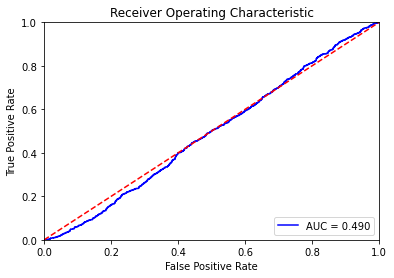

In [8]:
fpr, tpr, threshold = metrics.roc_curve(test_data["labels"].astype('int'),test_data["IEDB_predictions"].astype('float'))
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
precision, recall, thresholds = metrics.precision_recall_curve(test_data["labels"].astype('int'),test_data["IEDB_predictions"].astype('float'))
PR_auc = metrics.auc(recall, precision)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


0.49034793971841245


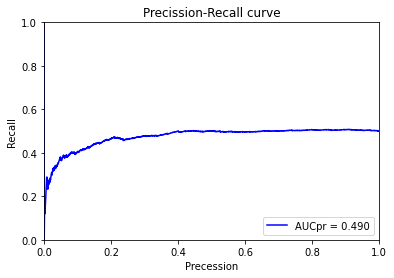

0.4739411898905295


In [9]:
fpr, tpr, threshold = metrics.roc_curve(test_data["labels"].astype('int'),test_data["IEDB_predictions"].astype('float'))
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
precision, recall, thresholds = metrics.precision_recall_curve(test_data["labels"].astype('int'),test_data["IEDB_predictions"].astype('float'))
PR_auc = metrics.auc(recall, precision)
plt.title('Precission-Recall curve')
plt.plot(recall, precision, 'b', label = 'AUCpr = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Recall')
plt.xlabel('Precession')
plt.show()
print(PR_auc)